# ADA Project - Insight into Switzerland agriculture production 

We will focus on Switzerland compared to its neighbours. We would like to know if Switzerland could be self-sufficient in term of food production. 

- What does Switzerland produce and in which quantity? 
- What about the amount of importations/exportations?
- Are all Switzerland areas optimally harvested?
- Limks to population size
- How is the Swiss productiviy trend evolving, is it correlated with external factors such as temperature, fertilizer use?

Then we will make comparaisons between Switzerland and its neighbours. Does CH import more than its neighbours (due to its small size ?) ?

Is food selfsuffience of CH realistic ? How many farmer would it need ?


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

## Data loading - Crops 

This dataset represents our start line, as it is the one we choose from the course's list.

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein)

In [2]:
raw_CH_crops_dataset = pd.read_csv('../data/FAOSTAT_data_crops_CHandNeighbours.csv')

Let's explore the structure of our dataset :

In [3]:
raw_CH_crops_dataset.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1961,1961,ha,NaN,M,Data not available
1,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1962,1962,ha,NaN,M,Data not available
2,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1963,1963,ha,NaN,M,Data not available
3,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1964,1964,ha,NaN,M,Data not available
4,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1965,1965,ha,NaN,M,Data not available


Keep only relevant information.

In [4]:
raw_CH_crops_dataset =raw_CH_crops_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [5]:
raw_CH_crops_dataset.drop(index=raw_CH_crops_dataset[raw_CH_crops_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [6]:
raw_CH_crops_dataset.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
24,Crops,Austria,Area harvested,Apples,1985,ha,16100.0,FAO estimate
25,Crops,Austria,Area harvested,Apples,1986,ha,16120.0,FAO estimate
26,Crops,Austria,Area harvested,Apples,1987,ha,16700.0,FAO estimate
27,Crops,Austria,Area harvested,Apples,1988,ha,16720.0,FAO estimate
28,Crops,Austria,Area harvested,Apples,1989,ha,17330.0,FAO estimate


Let's also load the flags dataset, in case we need it later (very small size --> doesn't cost anything)

In [7]:
flags = pd.read_csv('../data/FAOSTAT_data_flags.csv')
flags

,Flag,Flags
0,A,"Aggregate, may include official, semi-official..."
1,C,Calculated
2,Fc,Calculated data
3,M,Data not available
4,Im,FAO data based on imputation methodology
5,F,FAO estimate
6,NaN,Official data
7,/,Symbol for indigenous or liveweight meat
8,T,Trend
9,*,Unofficial figure


In [8]:
print("Size of the DataFrame: {s}\n".format(s=raw_CH_crops_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_CH_crops_dataset.dtypes))

Size of the DataFrame: (50563, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


Null values investigation:

In [9]:
print(raw_CH_crops_dataset.isnull().values.any(axis=0)) 

[False False False False False False False False]


No NaN values found. Perfect.

What about the categories listed in our columns?

In [10]:
print(raw_CH_crops_dataset['Domain'].unique())
print(raw_CH_crops_dataset['Area'].unique())
print(raw_CH_crops_dataset['Element'].unique())
print(raw_CH_crops_dataset['Item'].unique())
print(raw_CH_crops_dataset['Year'].unique())
print(raw_CH_crops_dataset['Unit'].unique())
print(raw_CH_crops_dataset['Flag Description'].unique())

['Crops']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area harvested' 'Yield' 'Production']
['Apples' 'Apricots' 'Asparagus' 'Barley' 'Beans, dry' 'Beans, green'
 'Berries nes' 'Broad beans, horse beans, dry' 'Buckwheat'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals, nes' 'Cherries' 'Cherries, sour'
 'Chillies and peppers, green' 'Cucumbers and gherkins' 'Currants'
 'Eggplants (aubergines)' 'Flax fibre and tow' 'Garlic' 'Gooseberries'
 'Grain, mixed' 'Grapes' 'Hemp tow waste' 'Hops'
 'Leeks, other alliaceous vegetables' 'Lettuce and chicory' 'Linseed'
 'Lupins' 'Maize' 'Maize, green' 'Millet' 'Mushrooms and truffles' 'Oats'
 'Oilseeds nes' 'Onions, dry' 'Peaches and nectarines' 'Pears' 'Peas, dry'
 'Peas, green' 'Plums and sloes' 'Poppy seed' 'Potatoes' 'Pulses, nes'
 'Pumpkins, squash and gourds' 'Rapeseed' 'Raspberries' 'Rye' 'Sorghum'
 'Soybeans' 'Spinach' 'Strawberries' 'Sugar beet' 'Sunflower seed'
 'Tobacco,

**Quick view of the crops dataset ready to be used**

In [11]:
raw_CH_crops_dataset.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
24,Crops,Austria,Area harvested,Apples,1985,ha,16100.0,FAO estimate
25,Crops,Austria,Area harvested,Apples,1986,ha,16120.0,FAO estimate
26,Crops,Austria,Area harvested,Apples,1987,ha,16700.0,FAO estimate
27,Crops,Austria,Area harvested,Apples,1988,ha,16720.0,FAO estimate
28,Crops,Austria,Area harvested,Apples,1989,ha,17330.0,FAO estimate


## **Crops plots :** what we can already see/investigate with this first dataset

Even if we will probably not use those plots for final presentation/analysis, it helps us to see what's inside our data. It is quick and very visual.

### Plot production of all countries over time for a selected crop

This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production over years for the 6 countries (CH + Neighbours as listed above).

In [12]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
# All those  library importations would probably be at the begining for the final version of te notebook, 
# but for now, we just kee them where we use them since we don't know what we will keep or not.

In [13]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = raw_CH_crops_dataset.loc[raw_CH_crops_dataset['Element']=='Production'].loc[raw_CH_crops_dataset['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'Production of {item} in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
items = raw_CH_crops_dataset.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Asparagus', 'Barley', 'Bean…

<function __main__.viz_evolution(item)>

For some datas we can see that we miss datas along some years. 
ex: item=Artichokes
What do we do? linear interpolation? drop this item? 

### Plot production/area_harvested for all items of all countries over time.

This plot is interactive. It allows you to choose for an element (production/area harvested/yield) and shows you the sum of all items for each country over years (CH & Co)

In [14]:
# plot area harvested of each country over years
crops_sum = raw_CH_crops_dataset.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()
crops_sum.head() # Sum of area/yiel/production of items by country and year

,Area,Element,Year,Sum
0,Austria,Area harvested,1961,1179403.0
1,Austria,Area harvested,1962,1181222.0
2,Austria,Area harvested,1963,1174324.0
3,Austria,Area harvested,1964,1183615.0
4,Austria,Area harvested,1965,1133820.0


In [15]:
#Interactive visualization

#Plot the area harvested (sum of all items) for all countries over years
def viz_sum_evolution(element):
    df_viz_sum_evolution = crops_sum.loc[crops_sum['Element']== element]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'{element} of all items in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
elements = crops_sum.Element.unique()
interact(viz_sum_evolution, element = elements)  

interactive(children=(Dropdown(description='element', options=('Area harvested', 'Production', 'Yield'), value…

<function __main__.viz_sum_evolution(element)>

## Data loading - Land use indicators 

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
This file will allow is to know the potential of Switzerland in term of agriculture. Does the country use all his land or not? 

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [16]:
raw_land_use_dataset = pd.read_csv('../data/FAOSTAT_data_LandUseIndicators.csv')

In [17]:
raw_land_use_dataset.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1961,1961,%,47.51,Fc,Calculated data
1,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1962,1962,%,47.61,Fc,Calculated data
2,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1963,1963,%,47.45,Fc,Calculated data
3,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1964,1964,%,47.66,Fc,Calculated data
4,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1965,1965,%,47.92,Fc,Calculated data


In [18]:
raw_land_use_dataset =raw_land_use_dataset[['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Flag Description']]

In [19]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_use_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_use_dataset.dtypes))

Size of the DataFrame: (3324, 8)

Variable types present in DataFrame: 
Domain               object
Area                 object
Element              object
Item                 object
Year                  int64
Unit                 object
Value               float64
Flag Description     object
dtype: object


In [20]:
print(raw_land_use_dataset.isnull().values.any(axis=0))  # --> PERFECT!

[False False False False False False False False]


In [21]:
print(raw_land_use_dataset['Domain'].unique())
print(raw_land_use_dataset['Area'].unique())
print(raw_land_use_dataset['Element'].unique())
print(raw_land_use_dataset['Item'].unique())
print(raw_land_use_dataset['Year'].unique())
print(raw_land_use_dataset['Unit'].unique())
print(raw_land_use_dataset['Flag Description'].unique())

['Land use indicators']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Share in Agricultural land' 'Share in Land area' 'Share in Forest land']
['Arable land' 'Land under permanent crops' 'Cropland'
 'Land under perm. meadows and pastures'
 'Agriculture area actually irrigated' 'Land area equipped for irrigation'
 'Agricultural land' 'Forest land' 'Primary Forest' 'Planted Forest'
 'Other naturally regenerated forest'
 'Agriculture area under organic agric.']
[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
['%']
['Calculated data']


## **Land use indicators plots :** what we can already see/investigate with this second dataset

Even if we will probably not use those plots for final presentation/analysis, it helps us to see what's inside our data. It is quick and very visual.

### Plot the lands distribution in Switzerland

We would like to precise those data (with more datasets) by including also urban areas to the distribution.

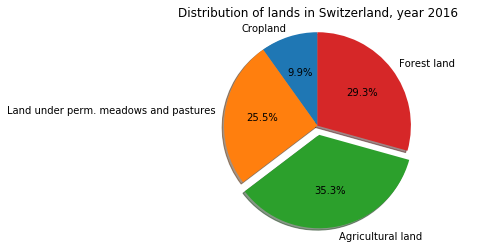

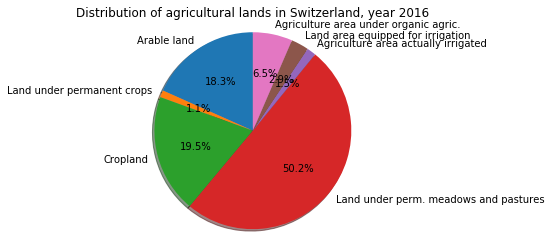

In [22]:
import matplotlib.pyplot as plt

# DataFrames to plot
df_land = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Land area']
df_agri = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Agricultural land']

# Pie plot #1
labels1 = df_land.Item
sizes1 = df_land.Value
explode = (0, 0, 0.1, 0)  # only "explode" the 3rd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode,labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Distribution of lands in Switzerland, year 2016')
fig1.set_facecolor('white')

# Pie plot #2
labels2 = df_agri.Item
sizes2 = df_agri.Value
fig1, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.title.set_text('Distribution of agricultural lands in Switzerland, year 2016')

# General settings
fig1.set_facecolor('white')
plt.show()

## Data loading - Demographical data 

File contains data about Switzerland and neighbours (Italy, Germany, France, Austria and Liechtenstein).
These data will allow us to know the number of consumers in switzerland and to compare the possible food-autonomie between switzerland and its neighbours. we would like to answer questions as: With the growing population, can we feed everybody with Swiss agriculture in the next few years?

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [23]:
demography = pd.read_csv('../data/FAOSTAT_data_demography.csv')

In [24]:
demography

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,11,Austria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 persons,6936.439,X,International reliable sources,"UNDESA, Population Division – World Population..."
1,OA,Annual population,11,Austria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 persons,6931.338,X,International reliable sources,"UNDESA, Population Division – World Population..."
2,OA,Annual population,11,Austria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1952,1952,1000 persons,6931.196,X,International reliable sources,"UNDESA, Population Division – World Population..."
3,OA,Annual population,11,Austria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1953,1953,1000 persons,6935.142,X,International reliable sources,"UNDESA, Population Division – World Population..."
4,OA,Annual population,11,Austria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1954,1954,1000 persons,6942.619,X,International reliable sources,"UNDESA, Population Division – World Population..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,OA,Annual population,211,Switzerland,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,8206.002,X,International reliable sources,NaN
410,OA,Annual population,211,Switzerland,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2015,2015,1000 persons,8296.775,X,International reliable sources,NaN
411,OA,Annual population,211,Switzerland,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2016,2016,1000 persons,8379.917,X,International reliable sources,NaN
412,OA,Annual population,211,Switzerland,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,8455.804,X,International reliable sources,NaN


In [25]:
for col in demography:
    print (demography[col].unique())

['OA']
['Annual population']
[ 11  68  79 106 125 211]
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
[511]
['Total Population - Both sexes']
[3010]
['Population - Est. & Proj.']
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
['1000 persons']
[6.9364390e+03 6.9313380e+03 6.9311960e+03 6.9351420e+03 6.9426190e+03
 6.953406

In [26]:
demography = demography[['Area', 'Year', 'Value']]
demography

,Area,Year,Value
0,Austria,1950,6936.439
1,Austria,1951,6931.338
2,Austria,1952,6931.196
3,Austria,1953,6935.142
4,Austria,1954,6942.619
...,...,...,...
409,Switzerland,2014,8206.002
410,Switzerland,2015,8296.775
411,Switzerland,2016,8379.917
412,Switzerland,2017,8455.804


The value unit beeing 1000 persons, we adjust the number to display the population values in terms of individuals

In [27]:
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
demography["Population"] = demography.Value.apply(lambda x: x*1000)
demography.drop(columns='Value')

,Area,Year,Population
0,Austria,1950,6936439.0
1,Austria,1951,6931338.0
2,Austria,1952,6931196.0
3,Austria,1953,6935142.0
4,Austria,1954,6942619.0
...,...,...,...
409,Switzerland,2014,8206002.0
410,Switzerland,2015,8296775.0
411,Switzerland,2016,8379917.0
412,Switzerland,2017,8455804.0


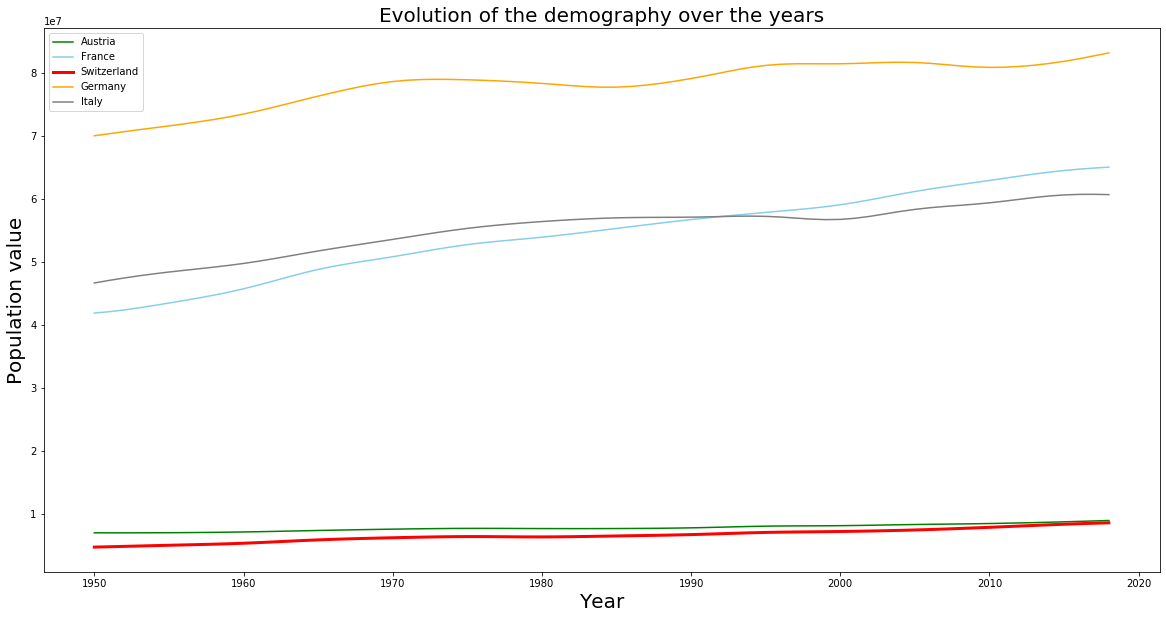

In [33]:
#plot of the evolution of the demography over the years. 
    
    # multiple line plot
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Austria'], marker='', color='green',  label = 'Austria')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='France'], marker='', color='skyblue', label = 'France')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Germany'], marker='', color='orange', label = 'Germany')
plt.plot( 'Year', 'Population', data=demography.loc[demography['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
plt.legend() 
plt.title('Evolution of the demography over the years' , fontsize= 20)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Population value", fontsize= 20)
plt.show()
   

   

We can see that as expected, the population is growing in every country. 

## Data loading - Importations for Switerland data 

File contains data about Switzerland only. This this file we want to know what Switzerland need and we could also look at the consumption trends of the swiss population.

Data exploration and pre-processing is very simmilar to first dataset. We will therefore not describe all steps as precisely as before.

In [34]:
CH_imports = pd.read_csv('../data/FAOSTAT_data_11-23-2019.csv')

In [35]:
CH_imports.shape

(177407, 16)

In [36]:
CH_imports

,Domain Code,Domain,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TM,Detailed trade matrix,211,Switzerland,2,Afghanistan,5610,Import Quantity,231,Almonds shelled,2016,2016,tonnes,0,NaN,Official data
1,TM,Detailed trade matrix,211,Switzerland,2,Afghanistan,5610,Import Quantity,527,"Apricots, dry",2012,2012,tonnes,0,NaN,Official data
2,TM,Detailed trade matrix,211,Switzerland,2,Afghanistan,5610,Import Quantity,633,"Beverages, non alcoholic",2005,2005,tonnes,0,NaN,Official data
3,TM,Detailed trade matrix,211,Switzerland,2,Afghanistan,5610,Import Quantity,689,"Chillies and peppers, dry",2013,2013,tonnes,0,NaN,Official data
4,TM,Detailed trade matrix,211,Switzerland,2,Afghanistan,5610,Import Quantity,767,Cotton lint,1995,1995,tonnes,23,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177402,TM,Detailed trade matrix,211,Switzerland,181,Zimbabwe,5610,Import Quantity,473,"Vegetables, frozen",2009,2009,tonnes,0,NaN,Official data
177403,TM,Detailed trade matrix,211,Switzerland,181,Zimbabwe,5610,Import Quantity,472,"Vegetables, preserved nes",2014,2014,tonnes,0,NaN,Official data
177404,TM,Detailed trade matrix,211,Switzerland,181,Zimbabwe,5610,Import Quantity,564,Wine,1993,1993,tonnes,0,NaN,Official data
177405,TM,Detailed trade matrix,211,Switzerland,181,Zimbabwe,5610,Import Quantity,564,Wine,2006,2006,tonnes,0,NaN,Official data


In [37]:
CH_imports.dtypes

Domain Code              object
Domain                   object
Reporter Country Code     int64
Reporter Countries       object
Partner Country Code      int64
Partner Countries        object
Element Code              int64
Element                  object
Item Code                 int64
Item                     object
Year Code                 int64
Year                      int64
Unit                     object
Value                     int64
Flag                     object
Flag Description         object
dtype: object

In [38]:
CH_imports.Year.min()

1986

In [39]:
for col in CH_imports:
    print (CH_imports[col].unique())

['TM']
['Detailed trade matrix']
[211]
['Switzerland']
[  2   3   4   6   7 258   8   9   1  22  10  11  52  12  13  16  14  57
 255  15  23  53  17  18  19  80  20  21  24 239  26  27 233  29  35 115
  32  33  36  37  39  40  96 128  41 214  43  44  45  46  47  48 107  98
  49  50 167  51 116 250  54  72  55  56  58  59  60  61 178  63 209 238
  62  65  64  66  67  68  69  70  71  74  75  73  79  81  82  84  85  86
  87  88  89  90  91  93  94  95  97  99 100 101 102 103 104 105 106 109
 110 112 108 114  83 118 113 120 119 121 122 123 124 126 256 129 130 131
 132 133 134 127 135 136 137 138 145 141 273 142 143 144  28 147 148 149
 150 151 153 156 157 158 159 160 154 162 221 165 299 166 168 169 170 171
 172 173 174 177 179 117 146 182 183 185 184 187 188 189 190 191 244 192
 193 194 195 272 186 196 197 200 199 198  25 201 202 277 203  38 276 206
 207 210 212 208 216 176 217 219 220 222 223 213 224 227 226 230 225 229
 215 231 240 252 234 228 235 155 236 237 205 249 248 251 181]
['Afgha

In [40]:
unofficial_stats_index = CH_imports.loc[CH_imports.Flag=='*'].index

In [41]:
# Drop the unofficial data
CH_imports = CH_imports.drop(index = unofficial_stats_index)

In [42]:
# Select only the data with Unit 'tonnes'
CH_imports = CH_imports.loc[CH_imports.Unit=='tonnes']

In [43]:
CH_imports = CH_imports[['Partner Countries', 'Item', 'Year', 'Unit', 'Value']]

In [44]:
# Sum the importations over all the partner countries
CH_imports = CH_imports.groupby(['Item', 'Year']).agg({'Value':'sum'})\
                                    .reset_index()

In [45]:
CH_crops = raw_CH_crops_dataset[['Area', 'Element', 'Item', 'Year', 'Unit', 'Value']]

Combine production and importation data

In [46]:
# Merge importations data with production data
CH_data = CH_crops.loc[CH_crops.Area=='Switzerland'].loc[CH_crops.Element=='Production'].loc[CH_crops.Year>= 1986]\
                                    .merge(CH_imports,on=['Item', 'Year'], how='left', suffixes=('_crops', '_imports'))

In [47]:
CH_data

,Area,Element,Item,Year,Unit,Value_crops,Value_imports
0,Switzerland,Production,Apples,1986,tonnes,393000.0,4607.0
1,Switzerland,Production,Apples,1987,tonnes,240200.0,5003.0
2,Switzerland,Production,Apples,1988,tonnes,492000.0,8975.0
3,Switzerland,Production,Apples,1989,tonnes,311000.0,1543.0
4,Switzerland,Production,Apples,1990,tonnes,397800.0,8468.0
...,...,...,...,...,...,...,...
1671,Switzerland,Production,Wheat,2013,tonnes,479659.0,436585.0
1672,Switzerland,Production,Wheat,2014,tonnes,550826.0,419904.0
1673,Switzerland,Production,Wheat,2015,tonnes,527257.0,396564.0
1674,Switzerland,Production,Wheat,2016,tonnes,386720.0,484790.0


Now, combine with the land analysis of switzerland, the consumers trends and the Swiss demography we could estimate if the country has an interest of producing more of an item, if it is able to produce more of an item and stop its importation of the item. --> # Milestone 3

### Plot production and import of items in Switzerland over years.

This plot is interactive. It allows you to choose for an item (apples, berries..) and shows you its production and importation in Switzerland over years.

In [48]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = CH_data.loc[CH_data['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value_crops', data=df_viz_evolution, marker='', color='red', label = 'crops', linewidth=3)
    plt.plot('Year', 'Value_imports', data=df_viz_evolution, marker='', color='blue', label = 'imports', linewidth=3) 
    plt.legend() 
    plt.title(f'Production and imports of {item} in Switzerland throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values [tonnes]", fontsize= 20)
    plt.show()
   
items = CH_data.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Artichokes', 'Asparagus', '…

<function __main__.viz_evolution(item)>

**Most produced and imported products :**

- Most produced crops products

In [49]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Value_crops', ascending = False).head(20)

,Area,Element,Item,Year,Unit,Value_crops,Value_imports
1443,Switzerland,Production,Sugar beet,2016,tonnes,1277407.0,42914.0
1674,Switzerland,Production,Wheat,2016,tonnes,386720.0,484790.0
1174,Switzerland,Production,Potatoes,2016,tonnes,372900.0,104191.0
30,Switzerland,Production,Apples,2016,tonnes,227300.0,11063.0
124,Switzerland,Production,Barley,2016,tonnes,159890.0,34152.0
803,Switzerland,Production,Maize,2016,tonnes,144406.0,165867.0
632,Switzerland,Production,Grapes,2016,tonnes,136352.0,34096.0
1253,Switzerland,Production,Rapeseed,2016,tonnes,71900.0,11978.0
311,Switzerland,Production,Carrots and turnips,2016,tonnes,68433.0,4203.0
739,Switzerland,Production,Lettuce and chicory,2016,tonnes,65946.0,37433.0


- Most imported crops products

In [50]:
CH_data.loc[CH_data.Year == 2016].sort_values(by='Value_imports', ascending = False).head(20)

,Area,Element,Item,Year,Unit,Value_crops,Value_imports
1674,Switzerland,Production,Wheat,2016,tonnes,386720.0,484790.0
803,Switzerland,Production,Maize,2016,tonnes,144406.0,165867.0
1174,Switzerland,Production,Potatoes,2016,tonnes,372900.0,104191.0
906,Switzerland,Production,Oats,2016,tonnes,7106.0,50129.0
1443,Switzerland,Production,Sugar beet,2016,tonnes,1277407.0,42914.0
1532,Switzerland,Production,Tomatoes,2016,tonnes,41907.0,38360.0
739,Switzerland,Production,Lettuce and chicory,2016,tonnes,65946.0,37433.0
1596,Switzerland,Production,"Vegetables, fresh nes",2016,tonnes,49909.0,34772.0
124,Switzerland,Production,Barley,2016,tonnes,159890.0,34152.0
632,Switzerland,Production,Grapes,2016,tonnes,136352.0,34096.0


### Plot most produced and imported items in Switzerland, year 2016.

This plot is interactive. Shows values upon cursor selection.

In [52]:
import plotly # conda install -c anaconda plotly #AND# jupyter labextension install @jupyterlab/plotly-extension
import plotly.graph_objects as go
y_wheat = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Wheat'].values[0,-2:]
y_potatoes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Potatoes'].values[0,-2:]
y_beet = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Sugar beet'].values[0,-2:]
#y_wheat = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Wheat'].Value_crops.values
#y_potatoes = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Potatoes'].Value_crops.values
#y_beet = CH_data.loc[CH_data.Year == 2016].loc[CH_data.Item=='Sugar beet'].Value_crops.values
x=['Produced', 'Imported']
fig = go.Figure(go.Bar(x=x, y=y_wheat, name='Wheat'))
fig.add_trace(go.Bar(x=x, y=y_potatoes, name='Potatoes'))
fig.add_trace(go.Bar(x=x, y=y_beet, name='Sugar beet'))

fig.update_layout(
    title='Most Imported and Produced items in Switzerland for year 2016',
    yaxis_title="Values [tonnes]",
    barmode='stack', 
    xaxis={'categoryorder':'category ascending'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f")
    )
fig.show()


### Plot importation/production of potatoes in Switzerland throughout years

This plot is interactive. Shows values upon cursor selection

In [53]:
import plotly.graph_objects as go

y_wheat = CH_data.loc[CH_data.Item=='Potatoes'].values[:,-2:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,0], fill='tonexty', name='Produced')) # fill down to xaxis
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=y_wheat[:,1], fill='tozeroy', name='Imported')) # fill to trace0 y
fig.update_layout(
    title="Potatoes importations and productions throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()


### Plot importation/production of potatoes in Switzerland throughout years --> WHHATS THE DIFFERENCE WITH FORMER PLOT?

This plot is interactive. Shows values upon cursor selection

In [54]:
total_crops_imports = CH_data.groupby('Year').agg({'Value_crops':'sum', 'Value_imports':'sum'})

In [55]:
total_crops_imports.Value_crops.values

array([3611629., 3271589., 4289942., 4148671., 3938041., 3753955.,
       4065684., 3976376., 3554016., 3565056., 4382304., 3984052.,
       4148595., 3611235., 4287171., 3485966., 3957861., 3394090.,
       4051477., 3800683., 3515845., 4043939., 4015469., 4233145.,
       3517504., 4453533., 4006568., 3481733., 4409758., 3575157.,
       3328950., 3930716.])

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports.Value_crops.values, fill='tonexty', name='Produced')) # fill down to xaxis
fig.add_trace(go.Scatter(x=CH_data.Year.unique(), y=total_crops_imports.Value_imports.values, fill='tozeroy', name='Imported')) # fill to trace0 y
fig.update_layout(
    title="Potatoes importations and productions throughout years in Switzerland",
    yaxis_title="Values [tonnes]",
    xaxis_title='Years'
    )
fig.show()


In [57]:
CH_data2 = CH_data.copy().rename(columns={'Value_crops':'Country production', 'Value_imports':'Importation'})
CH_data_transformed = pd.melt(CH_data2, value_vars=['Country production', 'Importation'], id_vars=['Area', 'Element','Item','Year','Unit'], var_name='Input', value_name='Value')

In [58]:
CH_data_transformed.loc[CH_data_transformed.Item=='Potatoes']

,Area,Element,Item,Year,Unit,Input,Value
1144,Switzerland,Production,Potatoes,1986,tonnes,Country production,742900.0
1145,Switzerland,Production,Potatoes,1987,tonnes,Country production,657700.0
1146,Switzerland,Production,Potatoes,1988,tonnes,Country production,836400.0
1147,Switzerland,Production,Potatoes,1989,tonnes,Country production,770000.0
1148,Switzerland,Production,Potatoes,1990,tonnes,Country production,712400.0
...,...,...,...,...,...,...,...
2847,Switzerland,Production,Potatoes,2013,tonnes,Importation,48530.0
2848,Switzerland,Production,Potatoes,2014,tonnes,Importation,40161.0
2849,Switzerland,Production,Potatoes,2015,tonnes,Importation,37785.0
2850,Switzerland,Production,Potatoes,2016,tonnes,Importation,104191.0


### Plot --> Je te laisse ecrire Max, pas trop sure là si cest only CH.. etc

This plot is interactive. Shows values upon cursor selection

In [ ]:
CH_restrained = CH_data_transformed.loc[CH_data_transformed.Item.isin(['Apples','Wheat','Potatoes', 'Maize', 'Oats'])]

In [ ]:
# Just trying a plot
import plotly.express as px
gapminder = px.data.gapminder()
fig = px.area(CH_restrained, x="Year", y="Value", color='Item',
      line_group="Input")
fig.update_layout(
    title="Add title",
    yaxis_title="Add y label",
    xaxis_title='Years'
    )
fig.show()

**Load Switzerland temperatures**

In [ ]:
CH_temperatures = pd.read_csv('../data/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt', sep="\t", header=0, skiprows=15)

In [ ]:
CH_temperatures = CH_temperatures.loc[CH_temperatures.time>=1986].loc[CH_temperatures.time<=2017]

In [ ]:
CH_temperatures = CH_temperatures.iloc[:,-3:]

In [ ]:
CH_temperatures

### Plot : Is there a correlation between production and temperature?


NameError: name 'CH_temperatures' is not defined

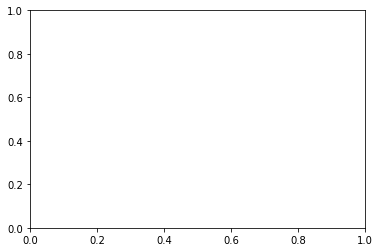

In [59]:
years = np.sort(CH_data.Year.unique())
fig, ax1 = plt.subplots()
data1 = CH_data.loc[CH_data.Item=='Potatoes'].Value_crops
data2 = CH_temperatures.year

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('production', color=color)
ax1.plot(years, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(years, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Potatoes production and temperatures every year')
plt.show()